In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import seaborn as sns
sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'Times New Roman'


## 2d plot

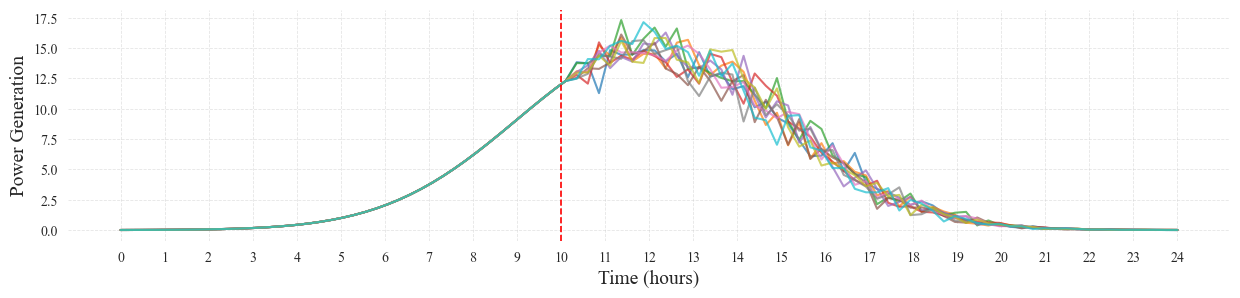

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian time series
def generate_pv_power(mean, std):
    time_steps = np.linspace(0, 24, 24 * 4)  # 15-minute resolution
    power = np.exp(-0.5 * ((time_steps - mean) / std)**2)  # Gaussian curve
    return time_steps, power*15

# Function to add Gaussian noise with varying intensity and proportional to power
def add_uncertainty(time_series, start_time, base_noise_std):
    time_steps = np.linspace(0, 24, len(time_series))
    noisy_series = time_series.copy()
    start_index = np.searchsorted(time_steps, start_time)+1
    total_horizon = len(time_series) - start_index

    # Define the Gaussian uncertainty function
    for i in range(start_index, len(time_series)):
        time_distance = (i - start_index) / total_horizon  # Normalize distance to [0, 1]
        # Gaussian function for uncertainty, centered at the midpoint of the horizon
        uncertainty_scale = np.exp(-0.5 * ((time_distance - 1) ** 2) / (0.5 ** 2))  # Narrow Gaussian
        noise_scale = base_noise_std * uncertainty_scale  # Scale noise by the Gaussian function
        noise = np.random.normal(0, noise_scale) * noisy_series[i]
        noisy_series[i] += noise

    noisy_series[start_index:] = np.clip(noisy_series[start_index:], 0, None)  # Ensure no negative power
    return noisy_series

# Function to plot multiple samples in 2D
def plot_2d_samples(mean, std, start_time, base_noise_std, num_samples=5):
    """
    Plot multiple samples of the noisy PV power time series in 2D.

    Parameters:
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.
        start_time (float): Time from which noise and uncertainty start.
        base_noise_std (float): Base standard deviation of the noise.
        num_samples (int): Number of samples to plot.
    """
    time_steps, power_series = generate_pv_power(mean, std)
    plt.figure(figsize=(15, 3))

    for i in range(num_samples):
        noisy_series = add_uncertainty(power_series, start_time, base_noise_std)
        plt.plot(time_steps, noisy_series, label=f'Sample {i+1}', alpha=0.7)

    # plt.plot(time_steps, power_series, label='Original PV Power', color='black', linewidth=2)
    plt.axvline(start_time, color='red', linestyle='--', label=f'Noise Start Time ({start_time}:00)', linewidth=1.2)

    # Set x-axis ticks
    hours_ticks = np.arange(0, 25, 1)
    plt.xticks(hours_ticks, minor=False)

    # Remove borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # plt.title("2D Visualization of Noisy PV Power Time Series with Gaussian Uncertainty")
    plt.xlabel("Time (hours)", fontsize=14)
    plt.ylabel("Power Generation", fontsize=14)
    # plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.5)
    # plt.savefig(f'{start_time}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()


    

# Main code
plot_2d_samples(mean=12, std=3, start_time=10, base_noise_std=0.3, num_samples=10)
